In [247]:
import pandas as pd
import pyodbc
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA




In [248]:
sales_crm = pyodbc.connect(r'Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=C:\Users\Jonat\Downloads\GO-databases schoon\go_crm_schoon.accdb;')

In [249]:
retailer = pd.read_sql("SELECT * FROM retailer", sales_crm)
crm_retailer_site = pd.read_sql("SELECT * FROM crm_retailer_site", sales_crm)
sales_demographic = pd.read_sql("SELECT DISTINCT * FROM sales_demographic", sales_crm)
retailer_contact = pd.read_sql("SELECT * FROM retailer_contact", sales_crm)


C:\Users\Jonat\AppData\Local\Temp\ipykernel_21304\3128161897.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  retailer = pd.read_sql("SELECT * FROM retailer", sales_crm)
C:\Users\Jonat\AppData\Local\Temp\ipykernel_21304\3128161897.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  crm_retailer_site = pd.read_sql("SELECT * FROM crm_retailer_site", sales_crm)
C:\Users\Jonat\AppData\Local\Temp\ipykernel_21304\3128161897.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sales_demographic = pd.read_sql("SELECT DISTINCT * F

# Data merging

In [250]:
retailer = pd.merge(retailer, crm_retailer_site[['RETAILER_CODE','COUNTRY_CODE', 'RETAILER_SITE_CODE']])
retailer = pd.merge(retailer, retailer_contact[['RETAILER_SITE_CODE', 'GENDER']])
retailer  


,RETAILER_CODE,RETAILER_CODEMR,COMPANY_NAME,RETAILER_TYPE_CODE,COUNTRY_CODE,RETAILER_SITE_CODE,GENDER
0,1,None,ActiForme,5,4,27,F
1,1,None,ActiForme,5,1,195,M
2,1,None,ActiForme,5,1,196,M
3,1,None,ActiForme,5,1,197,M
4,1,None,ActiForme,5,13,348,M
...,...,...,...,...,...,...,...
379,211,414,Outdoor-Fachgeschäft Müller,6,5,434,M
380,211,414,Outdoor-Fachgeschäft Müller,6,5,435,M
381,211,414,Outdoor-Fachgeschäft Müller,6,5,436,M
382,211,414,Outdoor-Fachgeschäft Müller,6,5,437,F


In [251]:
retailer = pd.merge(retailer, sales_demographic[['RETAILER_CODEMR', 'AGE_GROUP_CODE']])
retailer

,RETAILER_CODE,RETAILER_CODEMR,COMPANY_NAME,RETAILER_TYPE_CODE,COUNTRY_CODE,RETAILER_SITE_CODE,GENDER,AGE_GROUP_CODE
0,1,None,ActiForme,5,4,27,F,4
1,1,None,ActiForme,5,4,27,F,5
2,1,None,ActiForme,5,4,27,F,4
3,1,None,ActiForme,5,4,27,F,6
4,1,None,ActiForme,5,4,27,F,2
...,...,...,...,...,...,...,...,...
5462,211,414,Outdoor-Fachgeschäft Müller,6,5,438,F,2
5463,211,414,Outdoor-Fachgeschäft Müller,6,5,438,F,3
5464,211,414,Outdoor-Fachgeschäft Müller,6,5,438,F,4
5465,211,414,Outdoor-Fachgeschäft Müller,6,5,438,F,5


In [252]:
X = retailer.drop(["RETAILER_CODE", "RETAILER_TYPE_CODE", "RETAILER_CODEMR", "RETAILER_SITE_CODE", "COMPANY_NAME"], axis = 1)
X = pd.get_dummies(X, columns=["GENDER"], drop_first=True)
X = X.drop(["GENDER_64", "GENDER_BLind@sportjonas.com", "GENDER_Site Assistant Manager", "GENDER_Xavier"], axis = 1)


In [253]:
X = X.dropna()
X.isna().sum()
X


,COUNTRY_CODE,AGE_GROUP_CODE,GENDER_F,GENDER_M
0,4,4,1,0
1,4,5,1,0
2,4,4,1,0
3,4,6,1,0
4,4,2,1,0
...,...,...,...,...
5462,5,2,1,0
5463,5,3,1,0
5464,5,4,1,0
5465,5,5,1,0


In [254]:
# X.drop(["GENDER_F" ,"GENDER_M" ,"RETAILER_TYPE_CODE"], axis = 1)

# In this section...
It takes the the dataset and trains it using the Kmeans_Model, which is a clustering model. This model will group similar data points together based on their features or attributes.


In [255]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=400, n_init=10, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=4, n_init=10, random_state=0)

c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


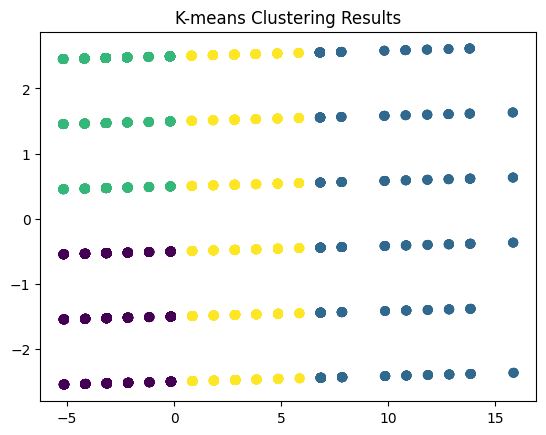

In [256]:

import matplotlib.pyplot as plt
X = X.values
# reduce dimensionality of data to 2 dimensions using PCA
pca = PCA(n_components=2)
result_pca = pca.fit_transform(X)

# predict cluster labels for the data
labels = kmeans.predict(X)

# plot the clusters
plt.scatter(result_pca[:, 0], result_pca[:, 1], c=labels, cmap='viridis')
plt.title('K-means Clustering Results')
plt.show()

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

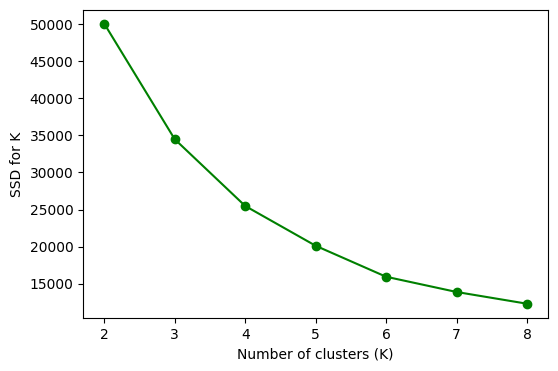

In [257]:
ssd = []
for k in range(2, 9):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(X)
    ssd.append(kmeans_model.inertia_)
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(range(2, 9), ssd, color="green", marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSD for K")
plt.show()
